<a href="https://colab.research.google.com/github/Anky597/clusermodel/blob/main/Clustermodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries for machine learning models and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import (silhouette_score, classification_report,
                             confusion_matrix, accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score,
                             mean_squared_error, mean_absolute_error, r2_score)

# Import libraries for advanced visualization
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from yellowbrick.cluster import KElbowVisualizer

# Import library for handling missing values
from sklearn.impute import SimpleImputer

# Import numpy for numerical operations
import numpy as np


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
# Load the dataset
df = pd.read_csv('/content/test.csv')


In [4]:
# Display the first 5 rows of the dataframe
print(df.head())


   User_ID Age      Gender  Platform  Daily_Usage_Time (minutes)  \
0      500  27      Female  Snapchat                         120   
1      488  21  Non-binary  Snapchat                          60   
2      776  28  Non-binary  Snapchat                         115   
3      869  27        Male  Telegram                         105   
4      573  21  Non-binary  Facebook                          55   

   Posts_Per_Day  Likes_Received_Per_Day  Comments_Received_Per_Day  \
0              4                      40                         18   
1              1                      18                          7   
2              3                      38                         18   
3              3                      48                         20   
4              3                      17                          7   

   Messages_Sent_Per_Day Dominant_Emotion  
0                     22          Neutral  
1                     12          Neutral  
2                     27        

In [5]:
# Get the shape of the dataframe
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Get information about data types and non-null counts
print(df.info())


Dataset contains 103 rows and 10 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     103 non-null    int64 
 1   Age                         103 non-null    object
 2   Gender                      103 non-null    object
 3   Platform                    103 non-null    object
 4   Daily_Usage_Time (minutes)  103 non-null    int64 
 5   Posts_Per_Day               103 non-null    int64 
 6   Likes_Received_Per_Day      103 non-null    int64 
 7   Comments_Received_Per_Day   103 non-null    int64 
 8   Messages_Sent_Per_Day       103 non-null    int64 
 9   Dominant_Emotion            103 non-null    object
dtypes: int64(6), object(4)
memory usage: 8.2+ KB
None


In [6]:
# Summary statistics for numerical columns
print(df.describe())


          User_ID  Daily_Usage_Time (minutes)  Posts_Per_Day  \
count  103.000000                  103.000000     103.000000   
mean   521.262136                   88.009709       2.864078   
std    288.949991                   33.979087       1.732326   
min     16.000000                   40.000000       1.000000   
25%    275.000000                   60.000000       1.000000   
50%    526.000000                   75.000000       2.000000   
75%    776.000000                  105.000000       4.000000   
max    997.000000                  200.000000       8.000000   

       Likes_Received_Per_Day  Comments_Received_Per_Day  \
count              103.000000                 103.000000   
mean                33.456311                  13.766990   
std                 23.031426                   8.107372   
min                  5.000000                   2.000000   
25%                 15.000000                   7.000000   
50%                 27.000000                  12.000000   
75%

In [7]:
# Check for missing values in each column
print(df.isnull().sum())


User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64


In [9]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Convert 'Age' to numeric, coercing errors to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Impute missing values in numeric columns
numeric_columns = ['Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day',
                   'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
                   'Messages_Sent_Per_Day']
imputer_numeric = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer_numeric.fit_transform(df[numeric_columns])

# Impute missing values in categorical columns
categorical_columns = ['Gender', 'Platform', 'Dominant_Emotion']
imputer_categorical = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = imputer_categorical.fit_transform(df[categorical_columns])

# Now the DataFrame should be free of missing values
print(df.head())


   User_ID   Age      Gender  Platform  Daily_Usage_Time (minutes)  \
0      500  27.0      Female  Snapchat                       120.0   
1      488  21.0  Non-binary  Snapchat                        60.0   
2      776  28.0  Non-binary  Snapchat                       115.0   
3      869  27.0        Male  Telegram                       105.0   
4      573  21.0  Non-binary  Facebook                        55.0   

   Posts_Per_Day  Likes_Received_Per_Day  Comments_Received_Per_Day  \
0            4.0                    40.0                       18.0   
1            1.0                    18.0                        7.0   
2            3.0                    38.0                       18.0   
3            3.0                    48.0                       20.0   
4            3.0                    17.0                        7.0   

   Messages_Sent_Per_Day Dominant_Emotion  
0                   22.0          Neutral  
1                   12.0          Neutral  
2                   

In [10]:
# Verify that there are no more missing values
print(df_cleaned.isnull().sum())


User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64


In [11]:
# Save the cleaned dataframe to a new CSV file
df_cleaned.to_csv('/content/test.csv', index=False)


In [12]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity

# Select the categorical columns
categorical_cols = ['Gender', 'Platform', 'Dominant_Emotion']

# Apply the encoder to the categorical columns
encoded_cols = encoder.fit_transform(df[categorical_cols])

# Convert encoded columns back to a DataFrame with appropriate column names
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate the encoded ones
df_encoded = pd.concat([df.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Display the first few rows of the encoded dataframe
print(df_encoded.head())


   User_ID   Age  Daily_Usage_Time (minutes)  Posts_Per_Day  \
0      500  27.0                       120.0            4.0   
1      488  21.0                        60.0            1.0   
2      776  28.0                       115.0            3.0   
3      869  27.0                       105.0            3.0   
4      573  21.0                        55.0            3.0   

   Likes_Received_Per_Day  Comments_Received_Per_Day  Messages_Sent_Per_Day  \
0                    40.0                       18.0                   22.0   
1                    18.0                        7.0                   12.0   
2                    38.0                       18.0                   27.0   
3                    48.0                       20.0                   28.0   
4                    17.0                        7.0                   12.0   

   Gender_Female  Gender_Male  Gender_Marie  ...  Platform_LinkedIn  \
0            1.0          0.0           0.0  ...                0.0   
1   

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Select the numerical columns to scale (excluding User_ID if not relevant to the analysis)
numerical_cols = ['Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day',
                  'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
                  'Messages_Sent_Per_Day']

# Apply the scaler to the numerical columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Display the first few rows of the scaled dataframe
print(df_encoded.head())


   User_ID       Age  Daily_Usage_Time (minutes)  Posts_Per_Day  \
0      500 -0.103294                    0.946074       0.658928   
1      488 -1.766871                   -0.828353      -1.081317   
2      776  0.173969                    0.798205       0.078846   
3      869 -0.103294                    0.502467       0.078846   
4      573 -1.766871                   -0.976222       0.078846   

   Likes_Received_Per_Day  Comments_Received_Per_Day  Messages_Sent_Per_Day  \
0                0.285509                   0.524672               0.219664   
1               -0.674378                  -0.838753              -1.143313   
2                0.198247                   0.524672               0.901153   
3                0.634559                   0.772567               1.037451   
4               -0.718009                  -0.838753              -1.143313   

   Gender_Female  Gender_Male  Gender_Marie  ...  Platform_LinkedIn  \
0            1.0          0.0           0.0  ...   

In [14]:
# Define the features (X) for clustering or analysis
X = df_encoded.drop(columns=['User_ID'])

# If you were doing supervised learning, you might also define y (labels)
# y = df_encoded['target_column']  # Replace 'target_column' with the actual label column


In [15]:
# Initialize the K-Means model
kmeans = KMeans(n_clusters=5, random_state=42)  # You can adjust the number of clusters (n_clusters)

# Fit the model to the data
kmeans.fit(X)

# Assign cluster labels to each user
df_encoded['Cluster'] = kmeans.labels_

# Display the first few rows to see the cluster assignments
print(df_encoded.head())


   User_ID       Age  Daily_Usage_Time (minutes)  Posts_Per_Day  \
0      500 -0.103294                    0.946074       0.658928   
1      488 -1.766871                   -0.828353      -1.081317   
2      776  0.173969                    0.798205       0.078846   
3      869 -0.103294                    0.502467       0.078846   
4      573 -1.766871                   -0.976222       0.078846   

   Likes_Received_Per_Day  Comments_Received_Per_Day  Messages_Sent_Per_Day  \
0                0.285509                   0.524672               0.219664   
1               -0.674378                  -0.838753              -1.143313   
2                0.198247                   0.524672               0.901153   
3                0.634559                   0.772567               1.037451   
4               -0.718009                  -0.838753              -1.143313   

   Gender_Female  Gender_Male  Gender_Marie  ...  Platform_Snapchat  \
0            1.0          0.0           0.0  ...   

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [16]:
# Group the data by the 'Cluster' column and calculate the mean of each feature
cluster_analysis = df_encoded.groupby('Cluster').mean()

# Display the cluster characteristics
print(cluster_analysis)


            User_ID       Age  Daily_Usage_Time (minutes)  Posts_Per_Day  \
Cluster                                                                    
0        460.629630  0.974950                   -0.746204      -0.780534   
1        613.000000 -0.128500                    0.428533       0.553458   
2        536.733333  0.569023                    1.902293       1.780418   
3        488.269231 -0.647156                   -0.191379      -0.233506   
4        540.076923 -1.169689                   -0.987596      -0.902830   

         Likes_Received_Per_Day  Comments_Received_Per_Day  \
Cluster                                                      
0                     -0.735785                  -0.783665   
1                      0.390621                   0.704959   
2                      2.051121                   1.689780   
3                     -0.290088                  -0.238083   
4                     -0.919384                  -1.038976   

         Messages_Sent_Per_Day  

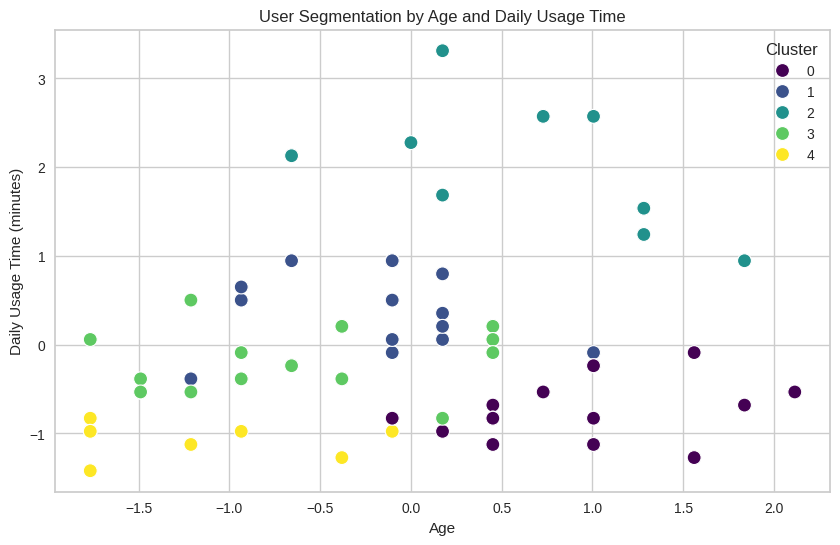

In [17]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot for visualization
plt.figure(figsize=(10, 6))

# Choose two features to plot (e.g., 'Age' and 'Daily_Usage_Time (minutes)')
sns.scatterplot(x='Age', y='Daily_Usage_Time (minutes)', hue='Cluster', data=df_encoded, palette='viridis', s=100)

# Add titles and labels
plt.title('User Segmentation by Age and Daily Usage Time')
plt.xlabel('Age')
plt.ylabel('Daily Usage Time (minutes)')
plt.legend(title='Cluster')

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

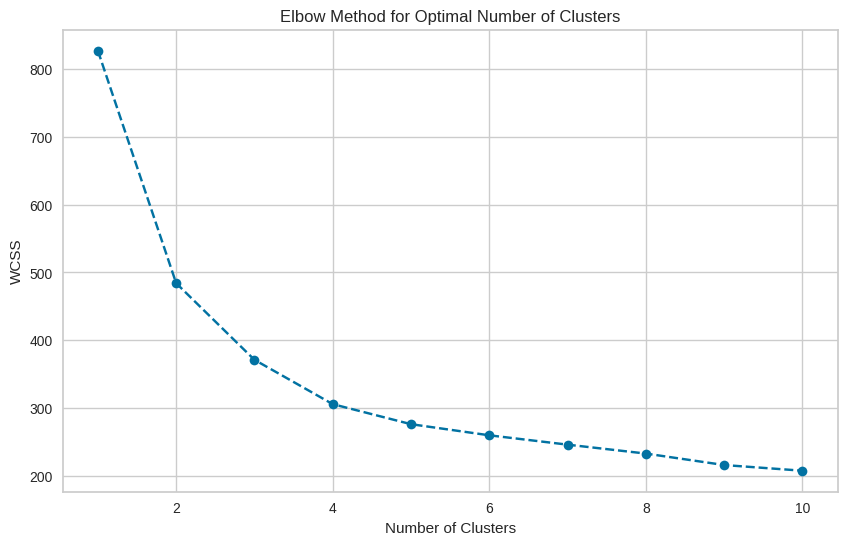

In [18]:
# Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values to visualize the Elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [19]:
# Initialize the K-Means model with the optimal number of clusters (e.g., 4)
optimal_kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model to the data
optimal_kmeans.fit(X)

# Assign the new cluster labels to each user
df_encoded['Optimal_Cluster'] = optimal_kmeans.labels_

# Display the first few rows to see the new cluster assignments
print(df_encoded.head())


   User_ID       Age  Daily_Usage_Time (minutes)  Posts_Per_Day  \
0      500 -0.103294                    0.946074       0.658928   
1      488 -1.766871                   -0.828353      -1.081317   
2      776  0.173969                    0.798205       0.078846   
3      869 -0.103294                    0.502467       0.078846   
4      573 -1.766871                   -0.976222       0.078846   

   Likes_Received_Per_Day  Comments_Received_Per_Day  Messages_Sent_Per_Day  \
0                0.285509                   0.524672               0.219664   
1               -0.674378                  -0.838753              -1.143313   
2                0.198247                   0.524672               0.901153   
3                0.634559                   0.772567               1.037451   
4               -0.718009                  -0.838753              -1.143313   

   Gender_Female  Gender_Male  Gender_Marie  ...  Platform_Telegram  \
0            1.0          0.0           0.0  ...   

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [20]:
# Group the data by the new 'Optimal_Cluster' column and calculate the mean of each feature
optimal_cluster_analysis = df_encoded.groupby('Optimal_Cluster').mean()

# Display the cluster characteristics
print(optimal_cluster_analysis)


                    User_ID       Age  Daily_Usage_Time (minutes)  \
Optimal_Cluster                                                     
0                577.470588 -0.250080                    0.232824   
1                502.518519 -0.976158                   -0.603811   
2                460.629630  0.974950                   -0.746204   
3                536.733333  0.569023                    1.902293   

                 Posts_Per_Day  Likes_Received_Per_Day  \
Optimal_Cluster                                          
0                     0.351826                0.200813   
1                    -0.651627               -0.656603   
2                    -0.780534               -0.735785   
3                     1.780418                2.051121   

                 Comments_Received_Per_Day  Messages_Sent_Per_Day  \
Optimal_Cluster                                                     
0                                 0.451761               0.476225   
1                            

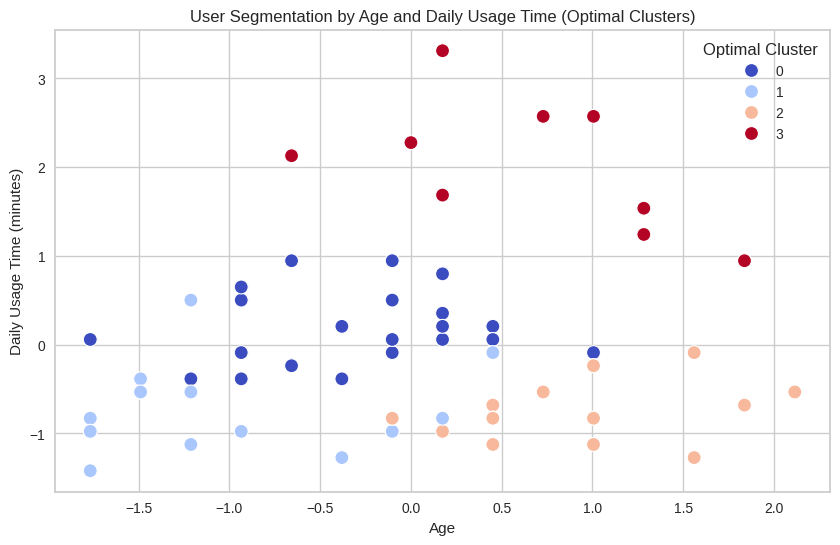

In [21]:
# Create a scatter plot for the new clusters
plt.figure(figsize=(10, 6))

# Choose two features to plot (e.g., 'Age' and 'Daily_Usage_Time (minutes)')
sns.scatterplot(x='Age', y='Daily_Usage_Time (minutes)', hue='Optimal_Cluster', data=df_encoded, palette='coolwarm', s=100)

# Add titles and labels
plt.title('User Segmentation by Age and Daily Usage Time (Optimal Clusters)')
plt.xlabel('Age')
plt.ylabel('Daily Usage Time (minutes)')
plt.legend(title='Optimal Cluster')

# Show the plot
plt.show()


In [22]:
# Review the cluster analysis table to understand the key characteristics of each cluster
print(optimal_cluster_analysis)

# Optionally, you can describe each cluster's key characteristics in terms of average age, platform usage, etc.
for cluster in range(optimal_cluster_analysis.shape[0]):
    print(f"Cluster {cluster} characteristics:")
    print(optimal_cluster_analysis.loc[cluster])
    print("\n")


                    User_ID       Age  Daily_Usage_Time (minutes)  \
Optimal_Cluster                                                     
0                577.470588 -0.250080                    0.232824   
1                502.518519 -0.976158                   -0.603811   
2                460.629630  0.974950                   -0.746204   
3                536.733333  0.569023                    1.902293   

                 Posts_Per_Day  Likes_Received_Per_Day  \
Optimal_Cluster                                          
0                     0.351826                0.200813   
1                    -0.651627               -0.656603   
2                    -0.780534               -0.735785   
3                     1.780418                2.051121   

                 Comments_Received_Per_Day  Messages_Sent_Per_Day  \
Optimal_Cluster                                                     
0                                 0.451761               0.476225   
1                            

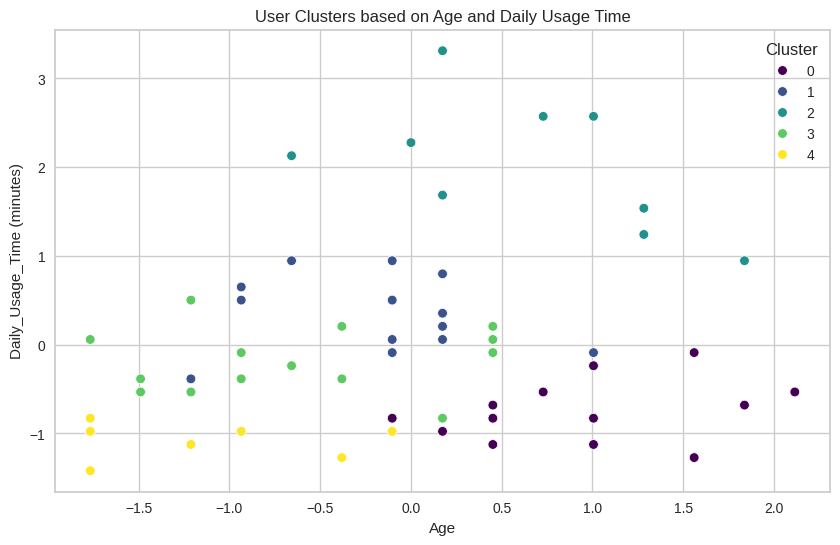

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example visualization using two important features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Daily_Usage_Time (minutes)', hue='Cluster', data=df_encoded, palette='viridis')
plt.title('User Clusters based on Age and Daily Usage Time')
plt.show()


In [24]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Calculate inertia
inertia = kmeans.inertia_
print(f'Inertia: {inertia}')


Silhouette Score: 0.21913270560029843
Inertia: 207.5587825378928


In [25]:
from sklearn.metrics import silhouette_score

# Test different numbers of clusters
for n_clusters in range(2, 11):  # Example range from 2 to 10
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels)
    print(f'Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Number of clusters: 2, Silhouette Score: 0.34838422962325605
Number of clusters: 3, Silhouette Score: 0.26385811692436323
Number of clusters: 4, Silhouette Score: 0.2642912412456626
Number of clusters: 5, Silhouette Score: 0.23366742645492866
Number of clusters: 6, Silhouette Score: 0.21958183143699708
Number of clusters: 7, Silhouette Score: 0.21533852241621018
Number of clusters: 8, Silhouette Score: 0.20358245613631798
Number of clusters: 9, Silhouette Score: 0.2056456374928874
Number of clusters: 10, Silhouette Score: 0.21913270560029843


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [26]:
# Save the updated dataframe with cluster information
df_encoded.to_csv('user_clusters.csv', index=False)

In [30]:
from sklearn.cluster import KMeans

# Assuming X is your feature matrix
model = KMeans(n_clusters=3)  # Define the model
model.fit(X)  # Train the model on the data


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

<ipython-input-31-dbdded81e272>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df_encoded, palette='viridis')


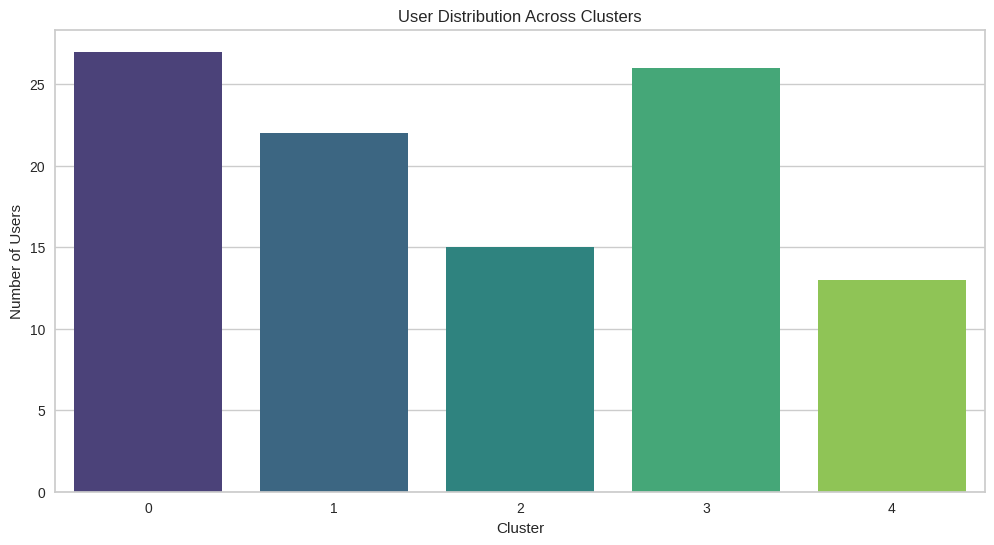

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of users across clusters
plt.figure(figsize=(12, 6))
sns.countplot(x='Cluster', data=df_encoded, palette='viridis')
plt.title('User Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.show()


<ipython-input-33-ab5be9793602>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Likes_Received_Per_Day', data=df_encoded, palette='viridis')


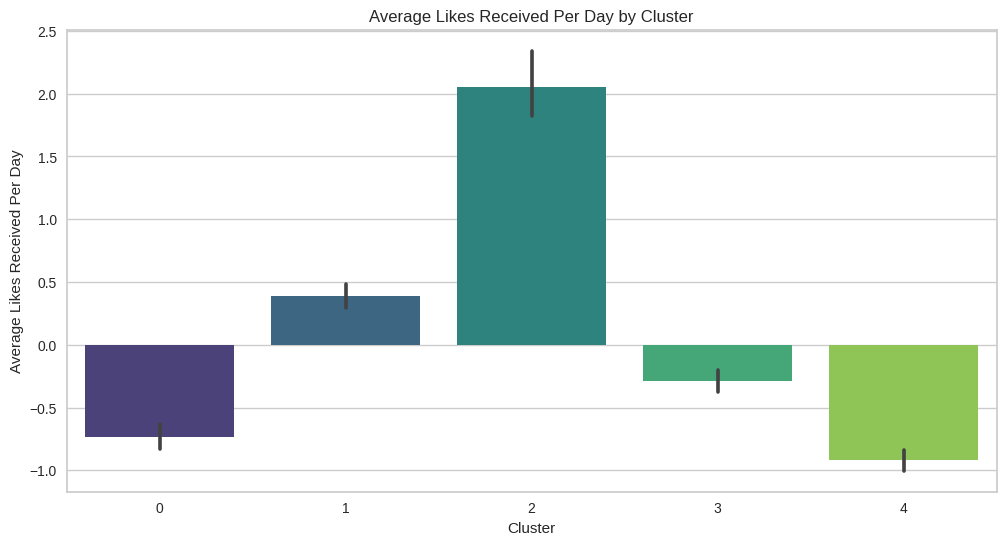

In [33]:
# Example: Analyze average likes received per day by cluster
plt.figure(figsize=(12, 6))
sns.barplot(x='Cluster', y='Likes_Received_Per_Day', data=df_encoded, palette='viridis')
plt.title('Average Likes Received Per Day by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Likes Received Per Day')
plt.show()


In [34]:
print(df_encoded.columns)

Index(['User_ID', 'Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day',
       'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Gender_Female', 'Gender_Male', 'Gender_Marie',
       'Gender_Non-binary', 'Platform_Instagram', 'Platform_LinkedIn',
       'Platform_Snapchat', 'Platform_Telegram', 'Platform_Twitter',
       'Platform_Whatsapp', 'Dominant_Emotion_Anxiety',
       'Dominant_Emotion_Boredom', 'Dominant_Emotion_Happiness',
       'Dominant_Emotion_Neutral', 'Dominant_Emotion_Sadness', 'Cluster',
       'Optimal_Cluster'],
      dtype='object')


<ipython-input-36-1b5319020d53>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Platform', y='Average_Daily_Usage_Time', data=avg_usage_melted, palette='viridis')


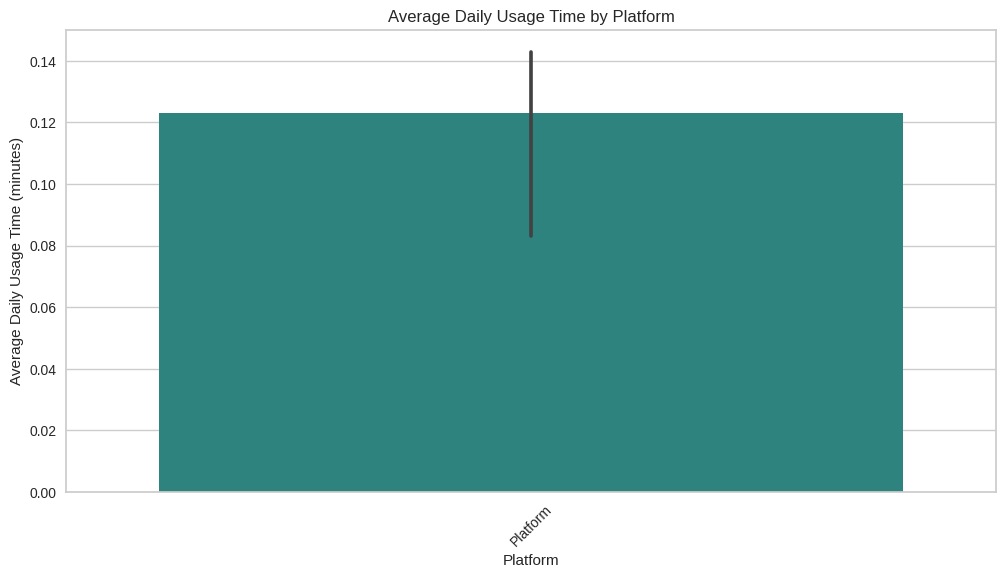

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of platform columns
platform_columns = ['Platform_Instagram', 'Platform_LinkedIn', 'Platform_Snapchat',
                     'Platform_Telegram', 'Platform_Twitter', 'Platform_Whatsapp']

# Extract the relevant columns and compute average daily usage time
platform_usage = df_encoded[platform_columns].copy()
platform_usage['Daily_Usage_Time (minutes)'] = df_encoded['Daily_Usage_Time (minutes)']

# Aggregate usage by platform
avg_usage_by_platform = platform_usage.groupby(platform_columns).mean().reset_index()

# Prepare for plotting
avg_usage_by_platform = avg_usage_by_platform.mean().reset_index()
avg_usage_by_platform.columns = ['Platform', 'Average_Daily_Usage_Time']

# Melt the DataFrame for easier plotting
avg_usage_melted = avg_usage_by_platform.melt(id_vars=['Average_Daily_Usage_Time'],
                                              var_name='Platform',
                                              value_name='Usage')

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='Average_Daily_Usage_Time', data=avg_usage_melted, palette='viridis')
plt.title('Average Daily Usage Time by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Daily Usage Time (minutes)')
plt.xticks(rotation=45)
plt.show()


   Cluster  Daily_Usage_Time (minutes)  Posts_Per_Day  Likes_Received_Per_Day  \
0        0                   -0.746204      -0.780534               -0.735785   
1        1                    0.428533       0.553458                0.390621   
2        2                    1.902293       1.780418                2.051121   
3        3                   -0.191379      -0.233506               -0.290088   
4        4                   -0.987596      -0.902830               -0.919384   

   Comments_Received_Per_Day  Messages_Sent_Per_Day  
0                  -0.783665              -0.774805  
1                   0.704959               0.634753  
2                   1.689780               1.618988  
3                  -0.238083              -0.047689  
4                  -1.038976              -1.237673  


<ipython-input-37-1016a371db10>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Daily_Usage_Time (minutes)', data=cluster_behavior, palette='viridis')


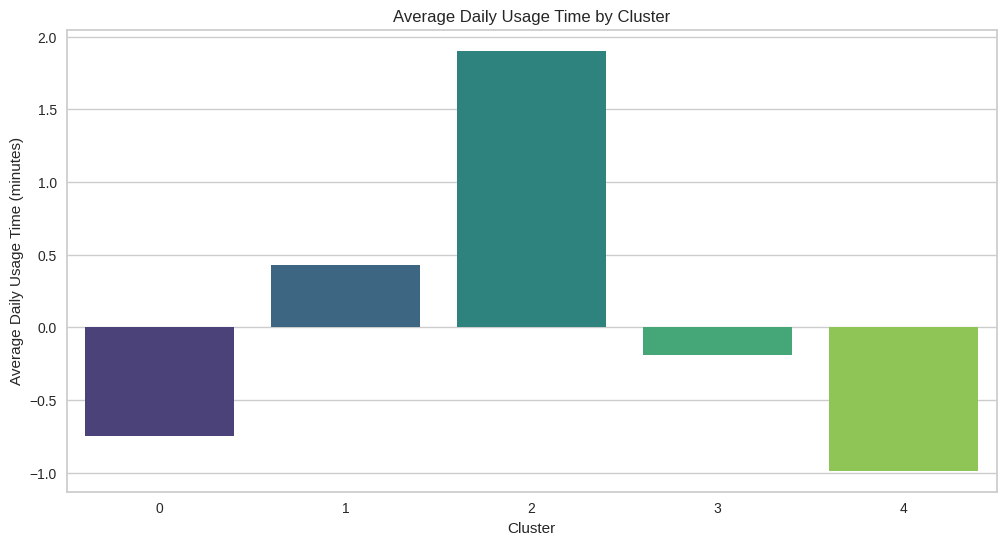

In [37]:
# Group by cluster and calculate mean values for activities
cluster_behavior = df_encoded.groupby('Cluster').agg({
    'Daily_Usage_Time (minutes)': 'mean',
    'Posts_Per_Day': 'mean',
    'Likes_Received_Per_Day': 'mean',
    'Comments_Received_Per_Day': 'mean',
    'Messages_Sent_Per_Day': 'mean'
}).reset_index()

# Print or visualize the behavior
print(cluster_behavior)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='Cluster', y='Daily_Usage_Time (minutes)', data=cluster_behavior, palette='viridis')
plt.title('Average Daily Usage Time by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Daily Usage Time (minutes)')
plt.show()


   Cluster  Dominant_Emotion_Anxiety  Dominant_Emotion_Boredom  \
0        0                  0.185185                  0.555556   
1        1                  0.454545                  0.000000   
2        2                  0.066667                  0.000000   
3        3                  0.153846                  0.000000   
4        4                  0.153846                  0.076923   

   Dominant_Emotion_Happiness  Dominant_Emotion_Neutral  \
0                    0.000000                  0.148148   
1                    0.090909                  0.136364   
2                    0.733333                  0.133333   
3                    0.038462                  0.384615   
4                    0.000000                  0.692308   

   Dominant_Emotion_Sadness  
0                  0.111111  
1                  0.136364  
2                  0.000000  
3                  0.269231  
4                  0.076923  


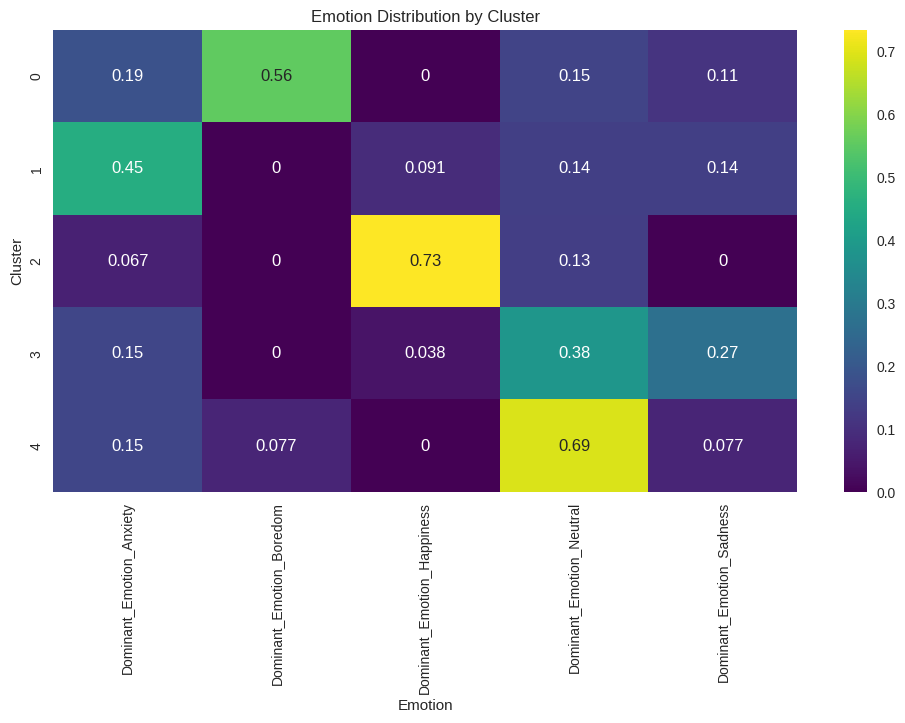

In [38]:
# Get emotion distribution by cluster
emotion_distribution = df_encoded.groupby('Cluster').agg({
    'Dominant_Emotion_Anxiety': 'mean',
    'Dominant_Emotion_Boredom': 'mean',
    'Dominant_Emotion_Happiness': 'mean',
    'Dominant_Emotion_Neutral': 'mean',
    'Dominant_Emotion_Sadness': 'mean'
}).reset_index()

# Print or visualize the distribution
print(emotion_distribution)

# Visualization
plt.figure(figsize=(12, 6))
sns.heatmap(emotion_distribution.set_index('Cluster'), annot=True, cmap='viridis')
plt.title('Emotion Distribution by Cluster')
plt.xlabel('Emotion')
plt.ylabel('Cluster')
plt.show()


                                     User_ID       Age  \
Cluster                                                  
0       User_ID                     1.000000  0.268534   
        Age                         0.268534  1.000000   
        Daily_Usage_Time (minutes)  0.444406  0.221215   
        Posts_Per_Day               0.010395 -0.009948   
        Likes_Received_Per_Day      0.089041  0.063301   
...                                      ...       ...   
4       Dominant_Emotion_Boredom    0.296553  0.113991   
        Dominant_Emotion_Happiness       NaN       NaN   
        Dominant_Emotion_Neutral   -0.208111 -0.885482   
        Dominant_Emotion_Sadness    0.290541  0.383425   
        Optimal_Cluster                  NaN       NaN   

                                    Daily_Usage_Time (minutes)  Posts_Per_Day  \
Cluster                                                                         
0       User_ID                                       0.444406       0.010395   
  

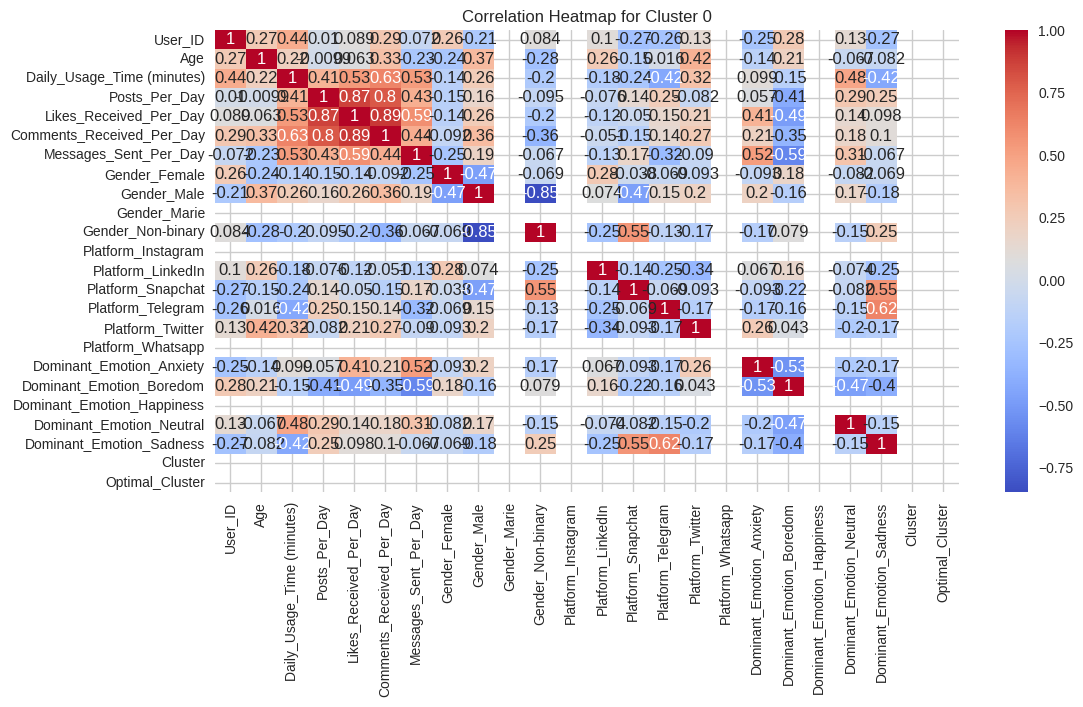

In [39]:
# Correlation analysis
correlation_analysis = df_encoded.groupby('Cluster').corr()

# Print or visualize correlation analysis
print(correlation_analysis)

# Visualization (example for one cluster)
cluster_id = 0
plt.figure(figsize=(12, 6))
sns.heatmap(df_encoded[df_encoded['Cluster'] == cluster_id].corr(), annot=True, cmap='coolwarm')
plt.title(f'Correlation Heatmap for Cluster {cluster_id}')
plt.show()


In [40]:
import joblib

# Save the KMeans model
joblib.dump(kmeans, 'kmeans_model.pkl')

print("KMeans model saved as 'kmeans_model.pkl'")


KMeans model saved as 'kmeans_model.pkl'


In [41]:
# Save the updated dataframe to a CSV file
df_encoded.to_csv('processed_data.csv', index=False)

print("Processed data saved as 'processed_data.csv'")


Processed data saved as 'processed_data.csv'
